In [ ]:
# This code plots representative Raman data and Raman peak position analysis for the thermal release paper
%matplotlib inline
import numpy as np; import matplotlib.pyplot as plt; plt.rcParams.update({'font.size': 6}); from math import sqrt;
import matplotlib.transforms as transforms; import string; import matplotlib.lines as mlines;

def linear(x,m,b):
    return m*x+b

# Load representative Raman data
path='/Users/ajcjake/Desktop/Thermal Release Paper/Raman Data/';
a=np.genfromtxt(path+'Gr_Cu_fixed.csv',delimiter=",");
xGrCu=a[:,0]; yGrCu=a[:,1];
b=np.genfromtxt(path+'Gr_PMMA_fixed.csv',delimiter=','); 
xGrPoly=b[:,0]; yGrPoly=b[:,1];
c=np.genfromtxt(path+'PMMA_fixed.csv',delimiter=','); 
xPoly=c[:,0]; yPoly=c[:,1];

#6 subplot version
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(8,3),dpi=300); plt.subplots_adjust(wspace=0.4);

# This code plots obtained Raman peak data for different temperatures
ms1=1; ms2=2;
for n in range(1,5):
    a=np.genfromtxt(path+'135/peakGCenters_'+str(n)+'.csv',delimiter=',');
    b=np.genfromtxt(path+'135/peak2DCenters_'+str(n)+'.csv',delimiter=',');
    peaksG=np.asarray(a); peaks2D=np.asarray(b);
    ax2.scatter(peaksG,peaks2D,c='C4',s=ms1,marker='o');
    ax5.errorbar(peaksG.mean(),peaks2D.mean(),xerr=peaksG.std(),yerr=peaks2D.std(),
                 c='C4',markersize=ms2,marker='o');

for n in range(6,9):
    a=np.genfromtxt(path+'120/peakGCenters_'+str(n)+'.csv',delimiter=',');
    b=np.genfromtxt(path+'120/peak2DCenters_'+str(n)+'.csv',delimiter=',');
    peaksG=np.asarray(a); peaks2D=np.asarray(b);
    ax1.scatter(peaksG,peaks2D,c='C3',s=ms1,marker='^');
    ax4.errorbar(peaksG.mean(),peaks2D.mean(),xerr=peaksG.std(),yerr=peaks2D.std(),
                 c='C3',markersize=ms2,marker='o');

for n in range(9,13):
    a=np.genfromtxt(path+'150/peakGCenters_'+str(n)+'.csv',delimiter=',');
    b=np.genfromtxt(path+'150/peak2DCenters_'+str(n)+'.csv',delimiter=',');
    peaksG=np.asarray(a); peaks2D=np.asarray(b);
    ax3.scatter(peaksG,peaks2D,c='C5',s=ms1,marker='s');
    ax6.errorbar(peaksG.mean(),peaks2D.mean(),xerr=peaksG.std(),yerr=peaks2D.std(),
                 c='C5',markersize=ms2,marker='s');
    
axs=[ax1,ax2,ax3,ax4,ax5,ax6];
a=np.genfromtxt(path+'strainFit.csv',delimiter=','); b=np.genfromtxt(path+'dopingFit.csv',delimiter=',');
x=np.linspace(1560,1615,100); yStrain=linear(x,a[0],a[1]); yDoping=linear(x,b[0],b[1]);
idx0=np.argwhere(x>1582)[0];
idx1=np.argwhere(yDoping>2657)[0]; idx2=np.argwhere(x>1595)[0];
idx3=np.argwhere(yStrain>2655)[0]; idx4=np.argwhere(x>1585.5)[0];
dxDoping=int(x[idx2]-x[idx1]); dyDoping=int(yDoping[idx2]-yDoping[idx1]);
dxStrain1=int(x[idx3]-x[idx0]); dyStrain1=int(yStrain[idx3]-yStrain[idx0]);
dxStrain2=int(x[idx4]-x[idx0]); dyStrain2=int(yStrain[idx4]-yStrain[idx0]);

wd=0.5;
for n,ax in enumerate(axs):
    ax.set_xlabel(r'G Peak Position $(cm^{-1})$'); ax.set_ylabel(r'2D Peak Position $(cm^{-1})$');
    #ax.axvline(1582,c='k',ls=':'); ax.axhline(2670,c='k',ls=':');
    #ax.plot(x,yStrain,c='k'); ax.plot(x,yDoping,c='k');
    ax.set_xlim([1580,1615]); ax.set_ylim([2660,2700]);
    ax.arrow(1582,2670,dxStrain1,dyStrain1,width=wd,length_includes_head=True,ec='C1',fc='C1');
    ax.arrow(1582,2670,dxStrain2,dyStrain2,width=wd,length_includes_head=True,ec='C2',fc='C2');
    ax.arrow(int(x[idx1]),int(yDoping[idx1]),dxDoping,dyDoping,width=wd,length_includes_head=True,ec='C0',fc='C0');
    #ax.text(1582,2670,'Intrinsic\nGr Peaks',ha='center',va='center',transform=ax.transData);
    ax.scatter(1582,2670,c='k',s=40,zorder=10);
    ax.text(1595,2675,'Doping',color='C0',transform=ax.transData,ha='center',va='center');
    ax.text(1586,2657,'Tensile Strain',color='C1',transform=ax.transData,ha='center',va='center');
    ax.text(1580,2681,'Compressive Strain',color='C2',transform=ax.transData,ha='center',va='center');

[ax.text(0.01,0.92,string.ascii_uppercase[n],transform=ax.transAxes,weight='bold') for n,ax in enumerate(axs)];

temp120=mlines.Line2D([],[],linestyle='-',marker='^',color='C4',label=r'120$\degree C$');
temp135=mlines.Line2D([],[],linestyle='-',marker='o',color='C3',label=r'135$\degree C$');
temp150=mlines.Line2D([],[],linestyle='-',marker='s',color='C5',label=r'150$\degree C$');
ax2.legend(handles=[temp120,temp135,temp150],loc='center',bbox_to_anchor=(1.2,1.1)); plt.show()

In [ ]:
# This code plots the final representative Raman data, coverage fractions, repeating small multiples of averaged 
# fitted peaks

%matplotlib inline

import numpy as np; import matplotlib.pyplot as plt; plt.rcParams.update({'font.size': 6}); from math import sqrt;
import matplotlib.transforms as transforms; import string;import matplotlib.lines as mlines;

def linear(x,m,b):
    return m*x+b

# Make custom subplot
fig=plt.figure(figsize=(6,4),dpi=300);
ax1=plt.subplot2grid((2,6),(0,0),colspan=3); ax2=plt.subplot2grid((2,6),(0,3),colspan=3);
ax3=plt.subplot2grid((2,6),(1,0),colspan=2);
ax4=plt.subplot2grid((2,6),(1,2),colspan=2);
ax5=plt.subplot2grid((2,6),(1,4),colspan=2);

cf=5; offset=100;
ax1.plot(xGrCu,cf*yGrCu,label='Graphene on copper');
ax1.plot(xGrPoly,offset+yGrPoly,label='Graphene on PMMA');
ax1.plot(xPoly,2*offset+yPoly,label='PMMA');

ax1.axvline(1582,ls=':',color='k'); ax1.axvline(2670,ls=':',color='k');
ax1.text(1582,0.9,'G',ha='center',va='center',
         transform=transforms.blended_transform_factory(ax1.transData,ax1.transAxes),
         bbox=dict(boxstyle='square',facecolor='white'));
ax1.text(2670,0.9,'2D',ha='center',va='center',
         transform=transforms.blended_transform_factory(ax1.transData,ax1.transAxes),
         bbox=dict(boxstyle='square',facecolor='white'));

ax1.text(0.45,225,'PMMA',ha='center',va='center',
         transform=transforms.blended_transform_factory(ax1.transAxes,ax1.transData));
ax1.text(0.45,120,'Gr on PMMA',ha='center',va='center',
         transform=transforms.blended_transform_factory(ax1.transAxes,ax1.transData));
ax1.text(0.45,20,'Gr on Copper',ha='center',va='center',
         transform=transforms.blended_transform_factory(ax1.transAxes,ax1.transData));

ax1.set_xlabel(r'Frequency $(cm^{-1})$'); ax1.set_ylabel('Intenstiy (a.u.)'); #ax1.set_xlim([1200,3250])

# Load and calculate Raman coverage data and variance
A=np.genfromtxt(path+'ramanSpotSummary.csv',delimiter=',',skip_header=1);
rCovF=[]; 
[rCovF.append(A[n:n+4].mean()) for n in np.arange(0,16,4)];
rErrF=np.genfromtxt(path+'ramanCoverageErr.csv',delimiter=',',skip_header=1);

# Plot Raman coverage data on horizontal bar plot
temps=[130,145,158,176];
colors=['C3','C4','C5','C6']; linewidth=1.5;
ax2.barh(temps,rCovF,xerr=rErrF,color=colors,height=10); 
ax2.set_xlabel('Graphene Coverage Percentage'); 
ax2.set_yticklabels([]); ax2.set_ylabel('Temperature',labelpad=-1);

[ax2.text(15,temps[n],str(temps[n])+r'$\degree C$',ha='center',va='center') for n in range(0,len(temps))];

# Plot obtained Raman peak data for different temperatures averaged over each sample
ms1=15; ms2=2;
for n in range(6,9):
    path='/Users/ajcjake/Desktop/Thermal Release Paper/Data/120/Popoff Graphene Coverage '+str(n);
    a=np.genfromtxt(path+'/peakLoc.csv',delimiter=',');
    peaksG=np.asarray(a[:,0]); peaks2D=np.asarray(a[:,1]);
    ax3.errorbar(peaksG.mean(),peaks2D.mean(),xerr=peaksG.std(),yerr=peaks2D.std(),
                 c='C3',markersize=ms2,marker='^',zorder=10);

for n in range(1,5):
    path='/Users/ajcjake/Desktop/Thermal Release Paper/Data/135/Popoff Graphene Coverage '+str(n);
    a=np.genfromtxt(path+'/peakLoc.csv',delimiter=',');
    peaksG=np.asarray(a[:,0]); peaks2D=np.asarray(a[:,1]);
    ax4.errorbar(peaksG.mean(),peaks2D.mean(),xerr=peaksG.std(),yerr=peaks2D.std(),
                 c='C4',markersize=ms2,marker='o',zorder=10);

for n in range(9,13):
    path='/Users/ajcjake/Desktop/Thermal Release Paper/Data/150/Popoff Graphene Coverage '+str(n);
    a=np.genfromtxt(path+'/peakLoc.csv',delimiter=',');
    peaksG=np.asarray(a[:,0]); peaks2D=np.asarray(a[:,1]);
    ax5.errorbar(peaksG.mean(),peaks2D.mean(),xerr=peaksG.std(),yerr=peaks2D.std(),
                 c='C5',markersize=ms2,marker='s',zorder=10);

# Load calculated strain and doping lines 
path='/Users/ajcjake/Desktop/Thermal Release Paper/Data/';
a=np.genfromtxt(path+'strainFit.csv',delimiter=','); b=np.genfromtxt(path+'dopingFit.csv',delimiter=',');
x=np.linspace(1560,1600,100); yStrain=linear(x,a[0],a[1]); yDoping=linear(x,b[0],b[1]);
idx0=np.argwhere(x>1582)[0];
idx1=np.argwhere(yDoping>2657)[0]; idx2=np.argwhere(x>1595)[0];
idx3=np.argwhere(yStrain>2655)[0]; idx4=np.argwhere(x>1585.5)[0];
dxDoping=int(x[idx2]-x[idx1]); dyDoping=int(yDoping[idx2]-yDoping[idx1]);
dxStrain1=int(x[idx3]-x[idx0]); dyStrain1=int(yStrain[idx3]-yStrain[idx0]);
dxStrain2=int(x[idx4]-x[idx0]); dyStrain2=int(yStrain[idx4]-yStrain[idx0]);

# Plot strain and doping lines, label everything
axs=[ax3,ax4,ax5]; wd=0.5;
for ax in axs:
    ax.set_xlabel(r'G Peak Position $(cm^{-1})$');
    ax.set_xlim([1560,1599]); ax.set_ylim([2655,2680]);
    ax.arrow(1582,2670,dxStrain1,dyStrain1,width=wd,length_includes_head=True,ec='C1',fc='C1',zorder=5);
    ax.arrow(1582,2670,dxStrain2,dyStrain2,width=wd,length_includes_head=True,ec='C2',fc='C2',zorder=5);
    ax.arrow(int(x[idx1]),int(yDoping[idx1]),dxDoping,dyDoping,width=wd,length_includes_head=True,ec='C0',fc='C0',
         zorder=0);
    ax.text(1593,2673,'n Doping',color='C0',transform=ax.transData,ha='center',va='center');
    ax.text(1587,2657,'Tensile Strain',color='C1',transform=ax.transData,ha='center',va='center');
    ax.text(1580,2681,'Compressive Strain',color='C2',transform=ax.transData,ha='center',va='center');
    ax.scatter(1582,2670,c='k',s=15,zorder=15);

ax4.set_yticklabels([]); ax5.set_yticklabels([]); ax3.set_ylabel(r'2D Peak Position $(cm^{-1})$');

#ax3.text(0.1,0.93,'test')#,color='C3',weight='bold');
#ax4.text(0.1,0.93,'test')#,color='C4',weight='bold');
#ax5.text(0.1,0.93,'test')#,color='C5',weight='bold');

# Label subplots
axs=[ax1,ax2,ax3,ax4,ax5];
[ax.text(0.93,0.93,string.ascii_uppercase[n],transform=ax.transAxes,weight='bold') for n,ax in enumerate(axs)];
plt.subplots_adjust(hspace=0.4,wspace=0.33);
plt.savefig(path+'popoff_Raman.eps',format='eps');

f = 0.5755494748885609


OSError: /Users/ajcjake/Downloads/PMMA_135_5_thrsIndices.csv not found.

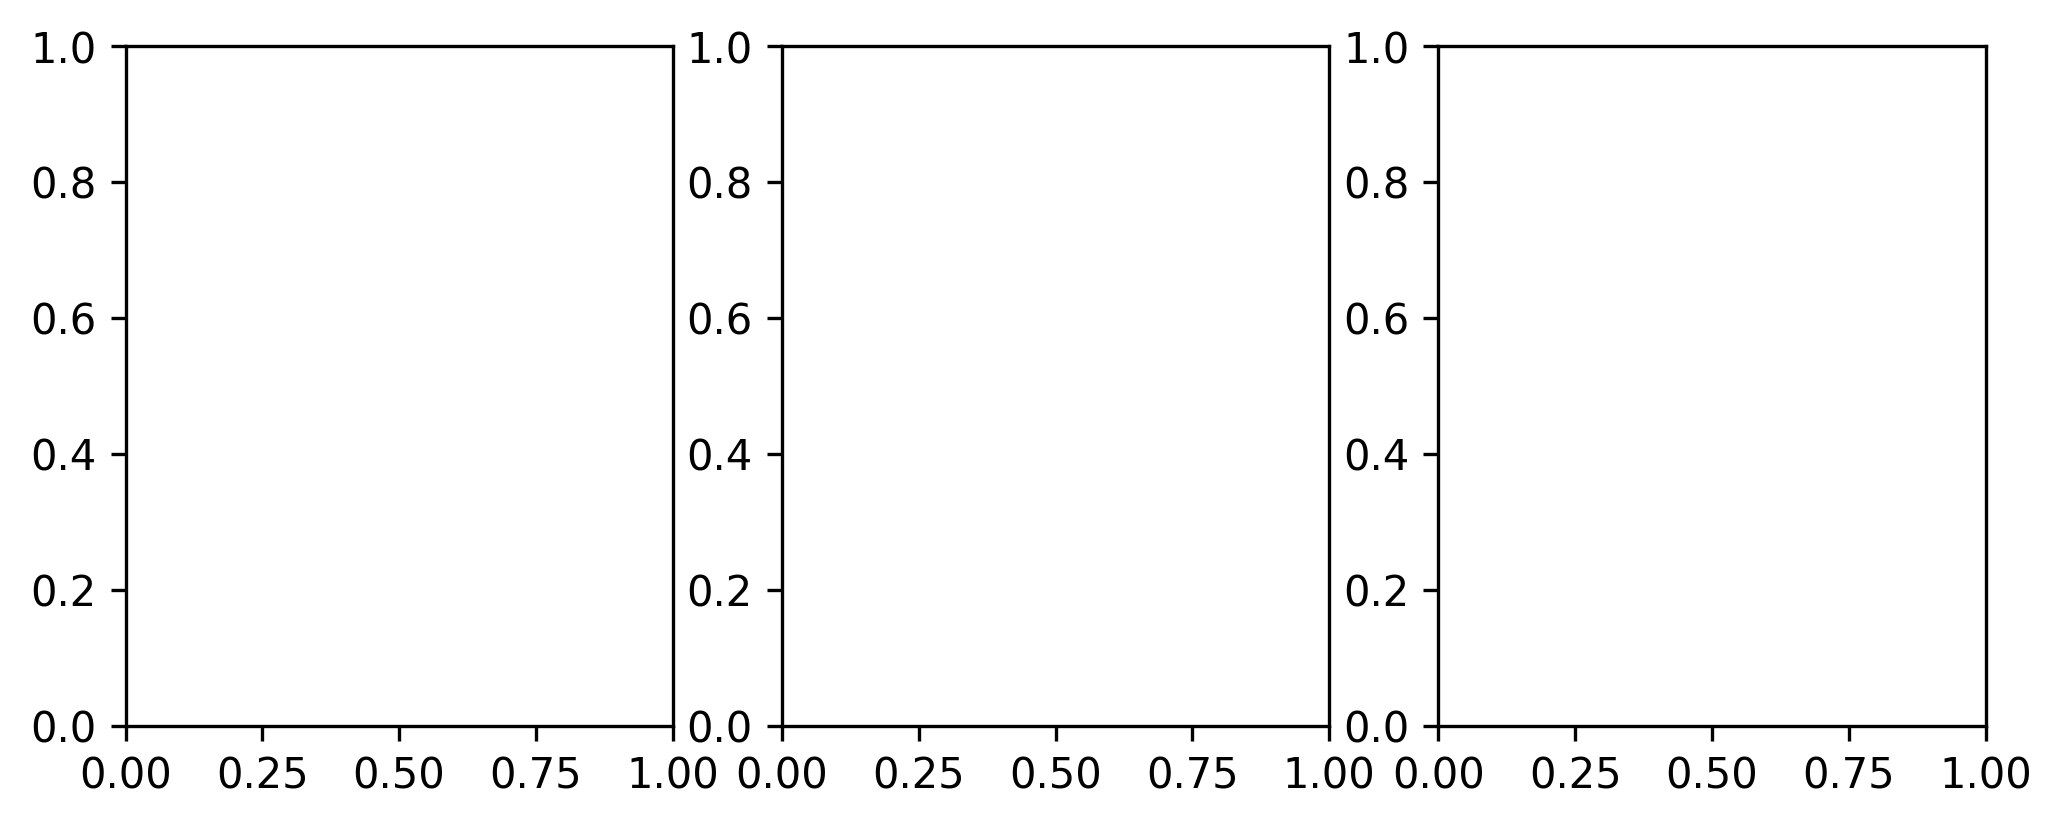

In [2]:
# Make SI figure of optical transmission data of plain PMMA substrate

%matplotlib inline
%run get_heatmap.ipynb

#Import necessary packages
import numpy as np; import pandas as pd; import seaborn as sb; import matplotlib.pyplot as plt; import string;
import scipy.stats as stats;

def gauss(x,*params):
    y=np.zeros_like(x);
    for i in range(0,len(params),3):
        a=params[i]; x0=params[i+1]; sigma=params[i+2];
        y=y+a*np.exp(-(x-x0)**2/(2*sigma**2));
    return y

# Make figure subplots
# Make figure subplots
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(8,3),dpi=300);

# Import data. Correct for background. Get heatmap
# path='C:\\Users\\acarr\\Documents\\Data\\Optical Transmission\\2020_03_11\\'; samp='Gr_6_8_glass_logo_1';
path='/Users/ajcjake/Downloads/'; samp='PMMA_135_5'
data=pd.read_csv(path+samp+'.csv',sep=',');
# Background correction for objective lens. f ~ 0.42
idx=data['Detected_Power'].idxmax(); Ins=data['Detected_Power'].iloc[idx]; Iinc=data['Incident_Power'].iloc[idx];
f=(3/2)*Ins/Iinc; print('f = '+str(f));
data['T']=data['Detected_Power']/((2/3)*f*data['Incident_Power']);
dataArray=get_heatmap(data,0.075,'T');

idxR1,idxR2,idxC1,idxC2,thrs1,thrs2 = np.genfromtxt(path+samp+'_thrsIndices.csv',delimiter=',').astype(np.int);

# Cut non-measured area. Display full image
sb.heatmap(dataArray,ax=ax1);
dataArray=dataArray.iloc[idxR1:idxR2,idxC1:idxC2].values;
sb.heatmap(dataArray,ax=ax2);

# Cut non-sample data. Display heatmap and KDE
sampArray=dataArray;
idx=np.where(sampArray<thrs1); sampArray[idx]=np.nan;
idx=np.where(sampArray>thrs2); sampArray[idx]=np.nan;
flatArray=sampArray[~np.isnan(sampArray)];

# Calculate probability density functions for both background and sample data
kde=stats.gaussian_kde(flatArray); kde.set_bandwidth(bw_method='silverman'); sKDE=kde(flatArray);

# Rename x and y KDE data for fitting process. Sort data
xGauss=flatArray; yGauss=sKDE;
sortIdx=np.argsort(xGauss); xGauss=xGauss[sortIdx]; yGauss=yGauss[sortIdx];

sParams2=np.genfromtxt(path+samp+'_fitParams.csv',delimiter=',');
amp=sParams2[0::3]; xCen=sParams2[1::3]; sigma=sParams2[2::3]; n=len(amp);
print(xCen)

# Check fitting results
ax3.scatter(xGauss,yGauss,color='C0'); ax3.plot(xGauss,gauss(xGauss,*sParams2),ls='--',color='C1');
[ax3.plot(xGauss,gauss(xGauss,*np.array([amp[m],xCen[m],sigma[m]])),color='C'+str(m+2)) for m in range(0,n)];

for n in range(0,len(xCen)):
    print('peak '+str(n+1)+' center = '+str(xCen[n]));
    try:
        print('delta T peak '+str(n+1)+' - '+str(n)+' = '+str(xCen[n+1]-xCen[n]));
    except:
        pass
    
# Label subplots
axs=[ax1,ax2,ax3];
[ax.text(0.05,0.94,string.ascii_uppercase[n],transform=ax.transAxes,weight='bold') for n,ax in enumerate(axs)];
axs=[ax1,ax2];
[ax.set_xlabel('') for ax in axs]; [ax.set_ylabel('') for ax in axs]; [ax.axis('off') for ax in axs]
ax3.set_xlabel('Transmission'); ax3.set_ylabel('Probability'); ax3.set_xlim([0.7,1.03])

plt.subplots_adjust(wspace=0.3,bottom=0.15); plt.savefig(path+'popoff_optTrans.eps',format='eps');